In [166]:
from collections import namedtuple

import numpy as np

from pytest import fixture

from invisible_cities.sierpe.blr import deconvolve_signal


deconv_params = namedtuple("deconv_params",
                           "n_baseline coeff_clean coeff_blr "
                           "thr_trigger accum_discharge_length")


@fixture(scope="session")
def sin_wf_params():
    n_baseline             = 500
    coeff_clean            = 1e-8
    coeff_blr              = 5e-1
    thr_trigger            = 1e-1
    accum_discharge_length = 100
    return deconv_params(n_baseline, coeff_clean, coeff_blr,
                         thr_trigger, accum_discharge_length)


@fixture
def sin_wf(sin_wf_params):
    baseline       = 0.0#np.random.uniform(1, 10)
    wf             = np.full(sin_wf_params.n_baseline, baseline)
    start          = np.random.choice (sin_wf_params.n_baseline // 2)
    length         = np.random.randint(sin_wf_params.n_baseline // 50,
                                       sin_wf_params.n_baseline // 2)
    stop           = start + length

    wf[start:stop]-= np.sin(np.linspace(0, 2 * np.pi, length))
    return wf


def test_blr(sin_wf, sin_wf_params):
    blr_wf = deconvolve_signal(sin_wf, **sin_wf_params._asdict())
    print(blr_wf)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 12, 8

In [167]:
wf = sin_wf(params)

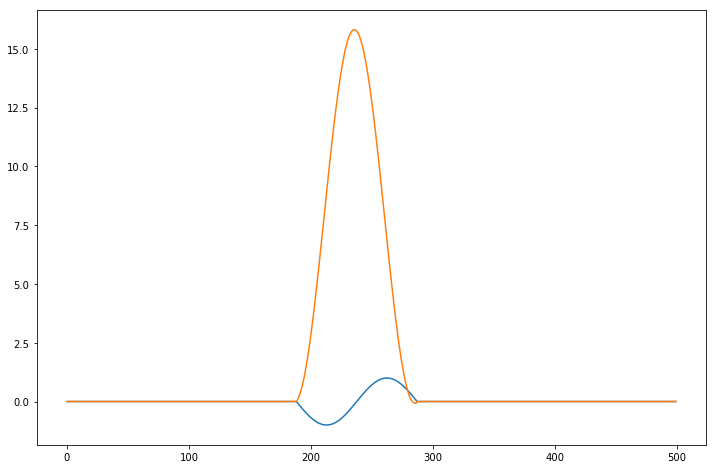

In [173]:
blr_wf = deconvolve_signal(wf.copy(), **sin_wf_params()._asdict())
plt.plot(wf)
plt.plot(blr_wf)

In [169]:
print(np.sum(blr_wf))

779.644044984


In [170]:
np.sum(wf)

0.0

In [176]:
np.mean(blr_wf), np.max(blr_wf)

(1.559288089968623, 15.810432697512052)

In [179]:
a, b = np.histogram(blr_wf, 1000)
a[:10], b[:10]

(array([  1,   1,   1,   0, 402,   1,   0,   0,   0,   1]),
 array([-0.0792799 , -0.06339019, -0.04750048, -0.03161076, -0.01572105,
         0.00016866,  0.01605837,  0.03194809,  0.0478378 ,  0.06372751]))

In [180]:
entries, amplitude = np.histogram(blr_wf, 200)
baseline = amplitude[np.argmax(entries)]


In [181]:
baseline

-0.079279900814107407

In [182]:
np.mean(blr_wf)

1.559288089968623